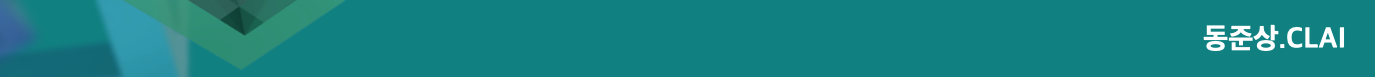

## 해군함정 가스터빈 추력발전기 (Naval Propulsion Plants) 시뮬레이션 데이터 분석

### Author: 동준상.넥스트플랫폼 (naebon1@gamil.com)

* Lecture 01: 2020.9.22 (화), GNTP IAI 38강
* Lecture 02: 2020.11.21 (토), KIDET Defense AI
* Lecture 03: 2020.12.4 (금), KIDET Defense AI
* Lecture 04: 2020.12.19 (토), KIDET Defense AI
* Lecture 05: 2021.1.7 (목), KIDET Defense AI
* Lecture 06: 2021.3.31 (수), GNU AI
* Lecture 07: 2021.6.17 (목), KOMIPO Bigdata
* Lecture 08: 2021.9.7 (화), KIDET Defense AI
* Lecture 09: 2021.9.13 (화), KIDET Defense AI
* Lecture 10: 2021.9.28 (화), KIDET Defense AI
* Lecture 11: 2021.9.30 (목), KPC DX
* Lecture 12: 2021.10.4 (월), KIDET Defense AI
* Lecture 13: 2021.10.26 (화), KPC NIPA SCM AI
* Lecture 14: 2021.10.28 (목), KPC NIPA SCM AI
* Lecture 15: 2021.11.11 (목), KPC AI 알고리즘 활용실무
* Lecture 16: 2021.11.29 (월), KIDET Defense AI
* Lecture 17: 2021.12.06 (월), KIDET Defense AI
* Lecture 18: 2022.5.24 (화), KPC - KOMIPO, 도고 교원연수원
* Lecture 19: Jason Dong, KPC AI (2022.07.19) AI 융합전문가
* Lecture 20: Jason Dong, KPC AI (2022.07.20) 물류중간관리자
* Lecture 21: 2022.10.05 (화), KPC
* Lecture 22: 2022.10.13 (목), KPC NIPA AI
* Lecture 23: 2022.10.14 (금), KPC NIPA AI
* Lecture 24: 2022.10.20 (목), KPC NIPA AI
* Lecture 25: 2022.10.21 (금), KPC NIPA AI
* Lecture 26: 2022.11.17 (목), KPC AI
* Lecture 27: 2022.11.22 (화), KPC NIPA AI
* Lecture 28: 2022.11.23 (수), KPC NIPA AI
* Lecture 29: 2022.11.29 (화), KPC NIPA AI
* Lecture 30: 2023.06.08 (목), KPC KOROAD AI

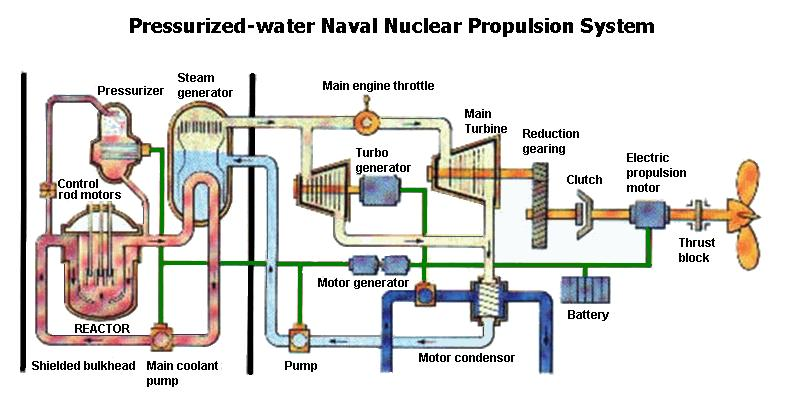

### 해군 함정용 가스터빈 엔진 시뮬레이터 생성 데이터 (CODLAG 타입 추력 발전기)
* Data have been generated from a sophisticated simulator
* of a Gas Turbines (GT), mounted on a Frigate characterized by
* a COmbined Diesel eLectric And Gas (CODLAG) propulsion plant type.


#### 추력 시스템 성능 파라미터
- 함정 속도 (Ship speed, linear function of the lever position, lp)
- 컴프레서 열화 상관계수 (Compressor degradation coefficient, kMc)
- 터빈 열화 상관계수 (Turbine degradation coefficient, kMt)

#### 원본 데이터세트 링크: UCI
* https://archive.ics.uci.edu/ml/datasets/Condition+Based+Maintenance+of+Naval+Propulsion+Plants

### 데이터세트 칼럼 네임

* 입력변수: 1~16번
* 출력변수: 17~18번

1. 레버 위치 / Lever position (lp) [ ]
2. 함정 속도 / Ship speed (v) [knots]
3. 가스 터빈 샤프트 토크 / Gas Turbine shaft torque (GTT) [kN m]
4. 가스 터빈 회전률 / Gas Turbine rate of revolutions (GTn) [rpm]
5. 가스 발전기 회전률 / Gas Generator rate of revolutions (GGn) [rpm]
6. 표준 프로펠러 토크 / Starboard Propeller Torque (Ts) [kN]
7. 포트 프로펠러 토크 / Port Propeller Torque (Tp) [kN]
8. HP 터빈 배출 온도 / HP Turbine exit temperature (T48) [C]
9. GT 컴프레서 흡입 공기 온도 / GT Compressor inlet air temperature (T1) [C]
10. GT 컴프레서 배출 공기 온도 / GT Compressor outlet air temperature (T2) [C]
11. HP 터빈 배출 압력 / HP Turbine exit pressure (P48) [bar]
12. GT 컴프레서 흡입 공기 압력 / GT Compressor inlet air pressure (P1) [bar]
13. GT 컴프레서 배출 공기 압력 / GT Compressor outlet air pressure (P2) [bar]
14. 가스 터빈 연소 가스 압력 / Gas Turbine exhaust gas pressure (Pexh) [bar]
15. 터빈 인젝션 컨트롤 / Turbine Injecton Control (TIC) [%]
16. 연료 흐름 / Fuel flow (mf) [kg/s]
17. GT 컴프레서 열화 상태 상관계수 / GT Compressor decay state coefficient (kMc)
18. GT 터빈 열화 상태 상관계수 / GT Turbine decay state coefficient (kMt)

### 1. 라이브러리 임포트

* numpy https://numpy.org/
* pandas https://pandas.pydata.org/
* sklearn https://scikit-learn.org/stable/
* matplotlib https://matplotlib.org/
* seaborn https://seaborn.pydata.org/

In [ ]:
# 파이썬 데이터 활용, 시각화 라이브러리

# numpy
# pandas
# matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 키워드 힌트가 없는 코드 완성 방법
1. 코드 라인 내에서 다른 키워드를 선택
2. 구글 등에서 해당 키워드를 검색
3. 개발자문서에서 해당 키워드의 참조 정보 확인

* 예: train_test_split 상위 모듈 찾기
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# 훈련 데이터와 검증 데이터 분할
from sklearn.model_selection import train_test_split

# 특성치 조절 (표준화)
from sklearn.preprocessing import StandardScaler #표준화

# 머신러닝 학습모델 (회귀분석, 지도식 학습)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 회귀분석 모델 성능검증
from sklearn.metrics import r2_score

In [ ]:
# 데이터 로딩
# read_csv()
# names
data = pd.read_csv("naval_gas_turbine_data.csv",
       names=['Lever position (lp) [ ]','Ship speed (v) [knots]','Shaft torque (GTT) [kN m]','Turbine Rate of revolutions (GTn) [rpm]','Generator rate of revolutions (GGn) [rpm]','Starboard Propeller Torque (Ts) [kN]','Port Propeller Torque (Tp) [kN]','HP Turbine exit temp (T48) [C]','GT Compressor inlet air temp (T1) [C]',
              'GT Compressor outlet air temp (T2) [C]','HP Turbine exit pressure (P48) [bar]','GT Compressor inlet air pressure (P1) [bar]','GT Compressor outlet air pressure (P2) [bar]','Gas Turbine exhaust gas pressure (Pexh) [bar]','Turbine Injecton Control (TIC) [%]','Fuel flow (mf) [kg/s]','GT Compressor decay coef [kMc]','GT Turbine decay coef [kMt]'])

In [ ]:
data

,Lever position (lp) [ ],Ship speed (v) [knots],Shaft torque (GTT) [kN m],Turbine Rate of revolutions (GTn) [rpm],Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temp (T48) [C],GT Compressor inlet air temp (T1) [C],GT Compressor outlet air temp (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay coef [kMc],GT Turbine decay coef [kMt]
0,1.14,3.0,290.0,1350.0,6680.0,7.58,7.58,464.0,288.0,551.0,1.10,0.998,5.95,1.02,7.14,0.082,0.95,0.975
1,2.09,6.0,6960.0,1380.0,6830.0,28.20,28.20,635.0,288.0,582.0,1.33,0.998,7.28,1.02,10.70,0.287,0.95,0.975
2,3.14,9.0,8380.0,1390.0,7110.0,60.40,60.40,606.0,288.0,588.0,1.39,0.998,7.57,1.02,13.10,0.259,0.95,0.975
3,4.16,12.0,14700.0,1550.0,7790.0,114.00,114.00,661.0,288.0,614.0,1.66,0.998,9.01,1.02,18.10,0.358,0.95,0.975
4,5.14,15.0,21600.0,1920.0,8490.0,175.00,175.00,731.0,288.0,646.0,2.08,0.998,11.20,1.03,26.40,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.14,15.0,21600.0,1920.0,8470.0,175.00,175.00,682.0,288.0,629.0,2.09,0.998,11.00,1.03,23.80,0.471,1.00,1.000
11930,6.18,18.0,29800.0,2310.0,8800.0,246.00,246.00,747.0,288.0,659.0,2.51,0.998,13.10,1.03,32.70,0.647,1.00,1.000
11931,7.15,21.0,39000.0,2680.0,9120.0,332.00,332.00,796.0,288.0,680.0,2.98,0.998,15.40,1.04,42.10,0.834,1.00,1.000
11932,8.21,24.0,51000.0,3090.0,9300.0,438.00,438.00,893.0,288.0,722.0,3.59,0.998,18.30,1.04,58.10,1.150,1.00,1.000


In [ ]:
# see the first 10 lines of data
# head()
data.head(10)

,Lever position (lp) [ ],Ship speed (v) [knots],Shaft torque (GTT) [kN m],Turbine Rate of revolutions (GTn) [rpm],Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temp (T48) [C],GT Compressor inlet air temp (T1) [C],GT Compressor outlet air temp (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay coef [kMc],GT Turbine decay coef [kMt]
0,1.14,3.0,290.0,1350.0,6680.0,7.58,7.58,464.0,288.0,551.0,1.10,0.998,5.95,1.02,7.14,0.082,0.95,0.975
1,2.09,6.0,6960.0,1380.0,6830.0,28.20,28.20,635.0,288.0,582.0,1.33,0.998,7.28,1.02,10.70,0.287,0.95,0.975
2,3.14,9.0,8380.0,1390.0,7110.0,60.40,60.40,606.0,288.0,588.0,1.39,0.998,7.57,1.02,13.10,0.259,0.95,0.975
3,4.16,12.0,14700.0,1550.0,7790.0,114.00,114.00,661.0,288.0,614.0,1.66,0.998,9.01,1.02,18.10,0.358,0.95,0.975
4,5.14,15.0,21600.0,1920.0,8490.0,175.00,175.00,731.0,288.0,646.0,2.08,0.998,11.20,1.03,26.40,0.522,0.95,0.975
5,6.18,18.0,29800.0,2310.0,8830.0,246.00,246.00,800.0,288.0,676.0,2.50,0.998,13.40,1.03,35.80,0.708,0.95,0.975
6,7.15,21.0,39000.0,2680.0,9130.0,332.00,332.00,855.0,288.0,700.0,2.96,0.998,15.70,1.04,45.90,0.908,0.95,0.975
7,8.21,24.0,51000.0,3090.0,9320.0,438.00,438.00,952.0,288.0,742.0,3.58,0.998,18.60,1.04,62.40,1.240,0.95,0.975
8,9.30,27.0,72800.0,3560.0,9780.0,645.00,645.00,1120.0,288.0,789.0,4.50,0.998,22.80,1.05,92.60,1.830,0.95,0.975
9,1.14,3.0,380.0,1360.0,6680.0,7.92,7.92,464.0,288.0,551.0,1.10,0.998,5.96,1.02,3.88,0.079,0.95,0.976


In [ ]:
data.tail(10)

,Lever position (lp) [ ],Ship speed (v) [knots],Shaft torque (GTT) [kN m],Turbine Rate of revolutions (GTn) [rpm],Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temp (T48) [C],GT Compressor inlet air temp (T1) [C],GT Compressor outlet air temp (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay coef [kMc],GT Turbine decay coef [kMt]
11924,9.30,27.0,72800.0,3560.0,9740.0,645.0,645.0,1040.0,288.0,768.0,4.53,0.998,22.50,1.05,86.200,1.710,1.0,0.999
11925,1.14,3.0,3130.0,1410.0,6670.0,10.7,10.7,510.0,288.0,553.0,1.21,0.998,6.45,1.02,0.088,0.146,1.0,1.000
11926,2.09,6.0,3880.0,1350.0,6760.0,22.5,22.5,519.0,288.0,555.0,1.23,0.998,6.57,1.02,20.700,0.172,1.0,1.000
11927,3.14,9.0,8380.0,1390.0,7060.0,60.3,60.3,564.0,288.0,573.0,1.39,0.998,7.42,1.02,11.400,0.226,1.0,1.000
11928,4.16,12.0,14700.0,1550.0,7730.0,114.0,114.0,617.0,288.0,599.0,1.66,0.998,8.83,1.02,16.200,0.320,1.0,1.000
11929,5.14,15.0,21600.0,1920.0,8470.0,175.0,175.0,682.0,288.0,629.0,2.09,0.998,11.00,1.03,23.800,0.471,1.0,1.000
11930,6.18,18.0,29800.0,2310.0,8800.0,246.0,246.0,747.0,288.0,659.0,2.51,0.998,13.10,1.03,32.700,0.647,1.0,1.000
11931,7.15,21.0,39000.0,2680.0,9120.0,332.0,332.0,796.0,288.0,680.0,2.98,0.998,15.40,1.04,42.100,0.834,1.0,1.000
11932,8.21,24.0,51000.0,3090.0,9300.0,438.0,438.0,893.0,288.0,722.0,3.59,0.998,18.30,1.04,58.100,1.150,1.0,1.000
11933,9.30,27.0,72800.0,3560.0,9740.0,645.0,645.0,1040.0,288.0,768.0,4.53,0.998,22.50,1.05,86.100,1.700,1.0,1.000


In [ ]:
print(data)

In [ ]:
#info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lever position (lp) [ ]                        11934 non-null  float64
 1   Ship speed (v) [knots]                         11934 non-null  float64
 2   Shaft torque (GTT) [kN m]                      11934 non-null  float64
 3   Turbine Rate of revolutions (GTn) [rpm]        11934 non-null  float64
 4   Generator rate of revolutions (GGn) [rpm]      11934 non-null  float64
 5   Starboard Propeller Torque (Ts) [kN]           11934 non-null  float64
 6   Port Propeller Torque (Tp) [kN]                11934 non-null  float64
 7   HP Turbine exit temp (T48) [C]                 11934 non-null  float64
 8   GT Compressor inlet air temp (T1) [C]          11934 non-null  float64
 9   GT Compressor outlet air temp (T2) [C]         119

In [ ]:
str(len(data))+'개의 인스턴스 존재'

### pandas.DataFrame.describe
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [ ]:
#describe()
data.describe()

,Lever position (lp) [ ],Ship speed (v) [knots],Shaft torque (GTT) [kN m],Turbine Rate of revolutions (GTn) [rpm],Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temp (T48) [C],GT Compressor inlet air temp (T1) [C],GT Compressor outlet air temp (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay coef [kMc],GT Turbine decay coef [kMt]
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.167778,15.000000,27249.165996,2137.177811,8200.955254,227.297807,227.297807,735.495726,288.0,646.215100,2.353415,9.980000e-01,12.297610,1.030000,33.641437,0.662556,0.97500,0.9875
std,2.627068,7.746291,22159.091763,774.184863,1091.297870,200.487306,200.487306,173.680016,0.0,72.676721,1.084821,2.220539e-16,5.337468,0.010541,25.841674,0.507320,0.01472,0.0075
min,1.140000,3.000000,254.000000,1310.000000,6590.000000,5.300000,5.300000,442.000000,288.0,540.000000,1.090000,9.980000e-01,5.830000,1.020000,0.000000,0.068000,0.95000,0.9750
25%,3.140000,9.000000,8380.000000,1390.000000,7060.000000,60.300000,60.300000,590.000000,288.0,578.000000,1.390000,9.980000e-01,7.450000,1.020000,13.700000,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21600.000000,1920.000000,8480.000000,175.000000,175.000000,706.000000,288.0,637.000000,2.080000,9.980000e-01,11.100000,1.030000,25.300000,0.496000,0.97500,0.9875
75%,7.150000,21.000000,39000.000000,2680.000000,9130.000000,332.000000,332.000000,834.000000,288.0,694.000000,2.980000,9.980000e-01,15.700000,1.040000,44.600000,0.882000,0.98800,0.9940
max,9.300000,27.000000,72800.000000,3560.000000,9800.000000,645.000000,645.000000,1120.000000,288.0,789.000000,4.560000,9.980000e-01,23.100000,1.050000,92.600000,1.830000,1.00000,1.0000


### 2. 데이터세트 분리 (훈련 데이터와 검증 데이터로 분리)

In [ ]:
#define y as being the "GT Compressor decay coef" from the original dataset
#copy()

gt_comp_decay_coef = data[['GT Compressor decay coef [kMc]']].###()

In [ ]:
#gt_comp_decay_coef[2500:2510]
gt_comp_decay_coef[500:###] # 시작 수는 포함, 종료 수는 미포함

In [ ]:
#define y as being the "GT Turbine decay coef" from the original dataset

gt_turb_decay_coef = ###[['GT Turbine decay coef [kMt]']].copy()

In [ ]:
#gt_turb_decay_coef[5500:5510]
gt_turb_decay_coef[###:11010]

In [ ]:
#Test train split
X_final = data

In [ ]:
X_final

In [ ]:
#gt_comp_decay_coef부터 분석 시행
#train_test_split()
#훈련용 데이터 67%, 검증용 데이터 33%

X_train, X_test, y_train, y_test = ###(X_final, gt_comp_decay_coef, test_size = 0.33, random_state = 0)

In [ ]:
# 0번부터~5번 '앞까지'의 데이터 출력
X_train[:#]

In [ ]:
X_test[##]

In [ ]:
y_train[##]

In [ ]:
y_test[:#]

### 데이터 시각화

##### 고도로 절제된 시뮬레이터 생성 데이터인 관계로
##### 데이터 요소 간의 색다른 관련성, 이상점 발견하기 어려움

* sns.heatmap()
* sns.pairplot()

In [ ]:
#분석 대상이 아닌 데이터 제거
#타겟 변수 외에 6개를 제거해 보세요!
#drop()
#축 방향은 열(column), 수직 방향

minimal_data = data.###([
    'GT Compressor inlet air temp (T1) [C]',
    'GT Compressor inlet air pressure (P1) [bar]',
    'Gas Turbine exhaust gas pressure (Pexh) [bar]',
    'GT Compressor decay coef [kMc]',
    'GT Turbine decay coef [kMt]'],
    axis=1)

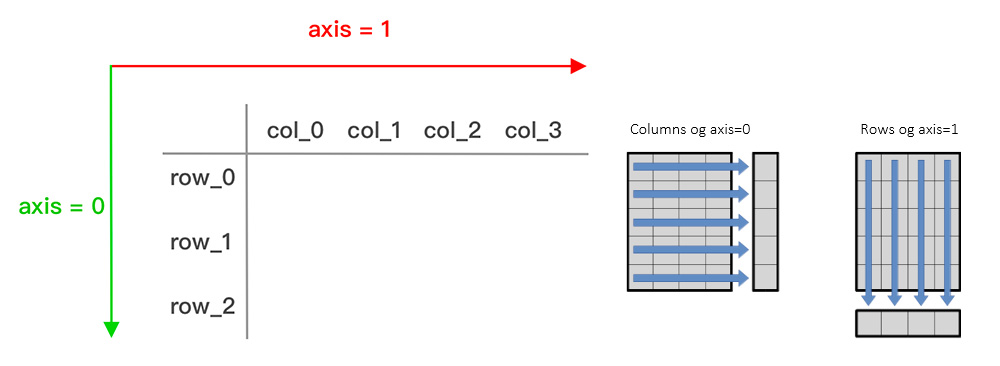

In [ ]:
minimal_data

In [ ]:
import seaborn as sns
%matplotlib inline

# heatmap()

plt.figure(figsize=(10,10))
sns.###(minimal_data.corr(),annot=True, fmt=".2f", cmap="YlGnBu")

In [ ]:
# pairplot()

sns.###(minimal_data)

In [ ]:
#figure, ax = plt.subplots(2,2, figsize=[12,8])

#sns.displot(data['var_1'], ax=ax[0,0])
#sns.displot(data['var_2'], ax=ax[0,1])
#sns.displot(data['var_3'], ax=ax[1,0])
#sns.displot(data['var_4'], ax=ax[1,1])

### 6. 특성치 조절 (표준화)

In [ ]:
#`np.float` is a deprecated

#standard scaler (fit transform on train, fit only on test)
s_scaler = ###()
X_train = s_scaler.fit_transform(X_train.astype(float))
X_test = s_scaler.transform(X_test.astype(float))

### 7. ML 모델 기반 예측

#### 의사결정수 회귀모델 / DecisionTreeRegressor

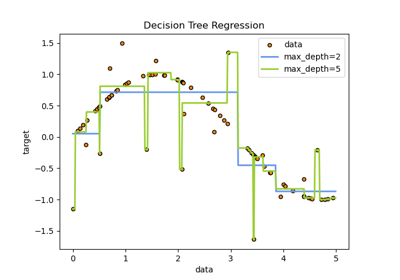

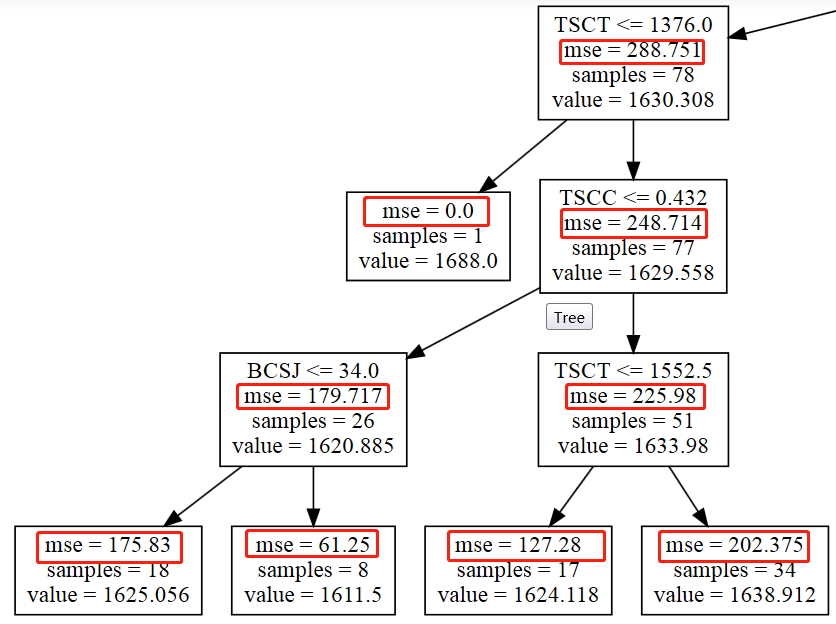

In [ ]:
#훈련함수: fit()
#예측함수: predict()

dt = DecisionTreeRegressor(random_state=0)

dt = dt.###(X_train, y_train.values.ravel())

# predict()
y_train_pred = dt.###(X_train)
y_test_pred = dt.predict(###)

#print score
print('dt train score %.3f, dt test score: %.3f' % (
  dt.###(X_train,y_train),
  dt.score(###,###)))

#### 랜덤포레스트 회귀모델 / RandomForestRegressor

In [ ]:
forest = ###(### = 100,
                              ###='squared_error',
                              random_state = 1,
                              n_jobs = -1)

forest.###(X_train, y_train.values.ravel())

y_train_pred = forest.###(X_train)
y_test_pred = forest.predict(X_test)

#print score
print('forest train score %.3f, forest test score: %.3f' % (
  forest.###(X_train,y_train),
  forest.score(X_test,y_test)))

## 두 분석 모델의 예측 성능이 같게 나온 이유는 무엇일까요?